In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import pickle
import random
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
class artStylesDataset(Dataset):
    def __init__(self,data_dir,transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [3]:
class ArtsClassifier(nn.Module):
    def __init__(self, num_classes=6):
        super(ArtsClassifier,self).__init__()
        self.base_model = timm.create_model("efficientnet_b0", pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        enet_out_size = 1280
        self.classifier = nn.Linear(enet_out_size,num_classes)
        

    def forward(self,x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [4]:
transform = transforms.Compose([
    transforms.Resize((464,300)),
    transforms.ToTensor(),
])

num_epoch = 25 #Around 5 - 10 is ideal
model_path = "./Results/artPythonModel-" + str(num_epoch) + "-epochs.pkl"
plot_path = "./Results/artPythonPlot-" + str(num_epoch) + "-epochs.png"

trainDataset = artStylesDataset("./Data", transform=transform)
validDataset = artStylesDataset("./Valid", transform=transform)

trainLoader = DataLoader(trainDataset,batch_size=16,shuffle=True)
validLoader = DataLoader(validDataset,batch_size=16,shuffle=True)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ArtsClassifier(num_classes=6)
model.to(device)

try:
    with open(model_path, 'rb') as file:  
        model = pickle.load(file)
except:
    pass

In [6]:
trainLoss,valLoss = [], []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(),lr=0.002)

print("Training session start")
for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    for images,labels in tqdm(trainLoader,desc="Training progress"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss/len(trainLoader.dataset)
    trainLoss.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images,labels in tqdm(validLoader,desc="Validation progress"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(validLoader.dataset)
    valLoss.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epoch} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training session start


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/25 - Train loss: 0.6833738606112244, Validation loss: 0.44798113182769156


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2/25 - Train loss: 0.2793524161657512, Validation loss: 0.376365065574646


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 3/25 - Train loss: 0.18123053038277354, Validation loss: 0.46913129547941096


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 4/25 - Train loss: 0.1350736088538065, Validation loss: 0.2587150874046179


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 5/25 - Train loss: 0.059409025745632706, Validation loss: 0.24291817978239402


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 6/25 - Train loss: 0.055292305456117165, Validation loss: 0.2194508254671326


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 7/25 - Train loss: 0.03534916125777918, Validation loss: 0.23926079823420598


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 8/25 - Train loss: 0.047979810281955304, Validation loss: 0.30475535759559047


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 9/25 - Train loss: 0.03264736244795874, Validation loss: 0.2773693967789698


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 10/25 - Train loss: 0.010421163906509637, Validation loss: 0.28688831603380655


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 11/25 - Train loss: 0.017199349218071334, Validation loss: 0.26989126741559283


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 12/25 - Train loss: 0.02823912571007072, Validation loss: 0.33125551901936817


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 13/25 - Train loss: 0.0157149065739992, Validation loss: 0.2426600216202832


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 14/25 - Train loss: 0.01591823218897596, Validation loss: 0.2455504142321073


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 15/25 - Train loss: 0.014498780616511364, Validation loss: 0.19150805012054312


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 16/25 - Train loss: 0.008807345951387813, Validation loss: 0.2544925836416391


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 17/25 - Train loss: 0.006094345456810114, Validation loss: 0.15317364737319833


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 18/25 - Train loss: 0.00334596551073876, Validation loss: 0.19448816429357976


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 19/25 - Train loss: 0.018087382053023703, Validation loss: 0.2719417097595467


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 20/25 - Train loss: 0.010189711913946433, Validation loss: 0.1701750077365432


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 21/25 - Train loss: 0.015112639693911481, Validation loss: 0.20770194976402517


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 22/25 - Train loss: 0.016336705994834555, Validation loss: 0.20210307171711556


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 23/25 - Train loss: 0.005881631256682501, Validation loss: 0.2390154324864852


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 24/25 - Train loss: 0.004293780887736714, Validation loss: 0.22188659995221174


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 25/25 - Train loss: 0.005331241272595788, Validation loss: 0.10685064385291368


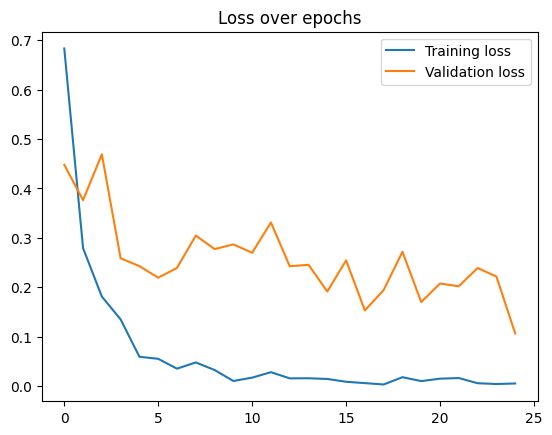

In [7]:
plt.plot(trainLoss, label="Training loss")
plt.plot(valLoss, label="Validation loss")
plt.legend()
plt.title("Loss over epochs")
saved = plt.gcf()
plt.show()
saved.savefig(plot_path)

Saving/Loading Model

In [8]:
with open(model_path, 'wb') as file:  
    pickle.dump(model, file)

Simple model test below

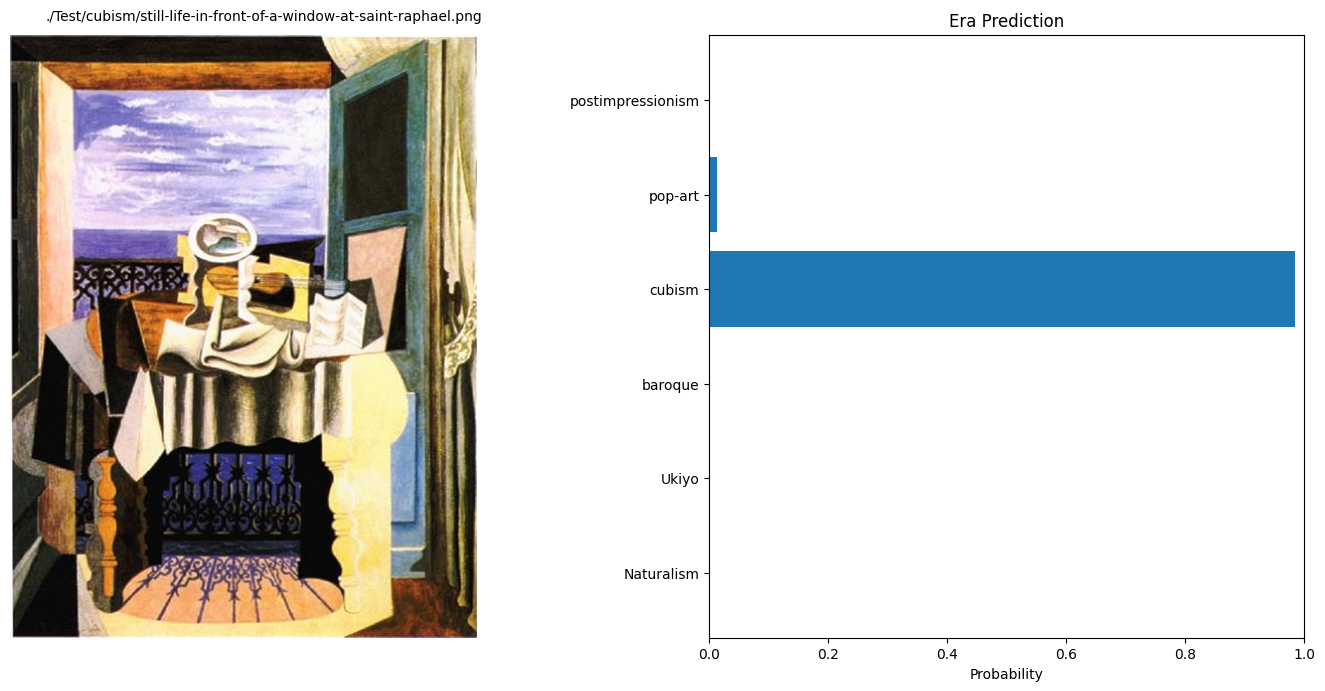

In [9]:
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

def visualize_predictions(original_image, probabilities, class_names, picture_name):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].text(35,-15,picture_name)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Era Prediction")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

image_paths = [
    "./Test/baroque/christ-in-the-storm.png",
    "./Test/baroque/the-anatomy-lesson-of-dr-nicolaes-tulp.png",
    "./Test/pop-art/mickey.png",
    "./Test/pop-art/interior-with-mirrored-wall.png",
    "./Test/postimpressionsm/bibemus-quarry.png",
    "./Test/postimpressionsm/vase-with-peonies.png",
    "./Test/cubism/still-life-in-front-of-a-window-at-saint-raphael.png",
    "./Test/cubism/hobo.png",
    "./Test/Naturalism/plate-162-zenaida-dove.png",
    "./Test/Naturalism/plate-171-barn-owl.png",
    "./Test/Ukiyo/woman-smoking.png",
    "./Test/Ukiyo/women-gathering-for-tooth-blackening-ceremony.png"
]

test_image = random.choice(image_paths)

#Special Case
#test_image = "./Test/cubism/landscape-near-antwerp.png"
#test_image = "./christ-in-the-storm.png"

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = trainDataset.classes 
visualize_predictions(original_image, probabilities, class_names, test_image)

END